In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the feature-engineered dataset
df = pd.read_csv('../data/processed/features_crypto.csv', parse_dates=['date'])


In [3]:
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72310 entries, 0 to 72309
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   open            72310 non-null  float64       
 1   high            72310 non-null  float64       
 2   low             72310 non-null  float64       
 3   close           72310 non-null  float64       
 4   volume          72310 non-null  float64       
 5   marketCap       72310 non-null  float64       
 6   timestamp       72310 non-null  object        
 7   crypto_name     72310 non-null  object        
 8   date            72310 non-null  datetime64[ns]
 9   log_return      72310 non-null  float64       
 10  volatility_7d   72310 non-null  float64       
 11  volatility_21d  72310 non-null  float64       
 12  ma_7            72310 non-null  float64       
 13  ma_21           72310 non-null  float64       
 14  vol_ratio       72310 non-null  float64       
 15  ta

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,log_return,volatility_7d,volatility_21d,ma_7,ma_21,vol_ratio,target_vol_7d
0,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,2013-12-27T23:59:59.999Z,Bitcoin,2013-12-27,-0.035955,8.901689,8.581779,314.866248,201.611326,7.000000,7.884601
1,24.806601,25.269100,22.263599,23.272301,31112200.0,5.660880e+08,2013-12-27T23:59:59.999Z,Litecoin,2013-12-27,-3.452702,8.901900,8.627728,220.732288,202.719516,2.793019,8.783791
2,0.000603,0.000628,0.000497,0.000522,477422.0,8.016604e+06,2013-12-27T23:59:59.999Z,Dogecoin,2013-12-27,-10.705298,8.970098,8.618737,220.729214,201.916912,0.042599,7.954442
3,0.024426,0.027123,0.023527,0.027076,148422.0,2.116741e+08,2013-12-27T23:59:59.999Z,XRP,2013-12-27,3.948912,9.131993,8.550137,220.729598,201.917168,0.013218,8.223179
4,0.027554,0.028106,0.026629,0.027303,143404.0,2.134534e+08,2013-12-28T23:59:59.999Z,XRP,2013-12-28,0.008371,8.619843,8.222379,217.196827,172.528944,0.012748,8.258219


In [4]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
open,72310.0,876.745012,0.0,0.167816,1.571752,25.523359,67549.735581,5253.629317
high,72310.0,903.138224,0.0,0.176759,1.659715,26.901756,162188.255437,5421.300042
low,72310.0,850.434695,0.0,0.158594,1.48201,24.114794,66458.723733,5100.701746
close,72310.0,877.841183,0.0,0.168219,1.57827,25.625814,67566.830088,5257.482545
volume,72310.0,2226629373.092354,0.0,8915431.664541,113350380.825,681313197.285581,350967941479.059998,9657576609.987427
marketCap,72310.0,14861964493.044905,0.0,189342884.34837,1283225645.305,5182278919.3775,1274831490851.01001,75317650831.259445
date,72310,2019-11-01 08:39:56.481814528,2013-12-27 00:00:00,2018-09-27 00:00:00,2020-03-24 00:00:00,2021-05-05 00:00:00,2022-10-23 00:00:00,NaN
log_return,72310.0,-0.000134,-33.218102,-3.708099,0.000005,3.726639,32.580493,5.792756
volatility_7d,72310.0,5.778819,0.660949,4.21113,5.51973,6.978764,21.228847,2.232125
volatility_21d,72310.0,5.768146,1.89234,4.82457,5.59756,6.507311,12.665627,1.375761


In [5]:
df.isna().sum().sort_values(ascending=False)


open              0
high              0
low               0
close             0
volume            0
marketCap         0
timestamp         0
crypto_name       0
date              0
log_return        0
volatility_7d     0
volatility_21d    0
ma_7              0
ma_21             0
vol_ratio         0
target_vol_7d     0
dtype: int64

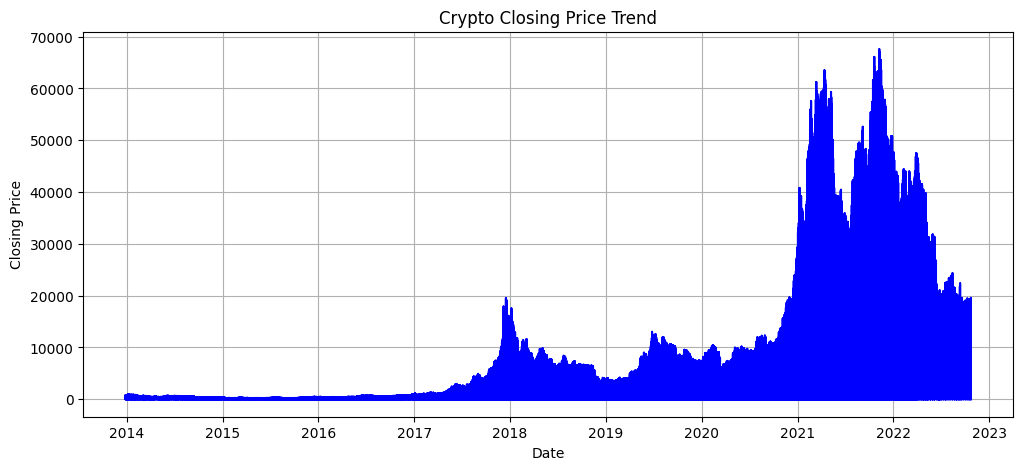

In [35]:
#Closing price trend
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['close'], color='blue')
plt.title("Crypto Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.savefig('../reports/figs/close_trend.png')

plt.show()


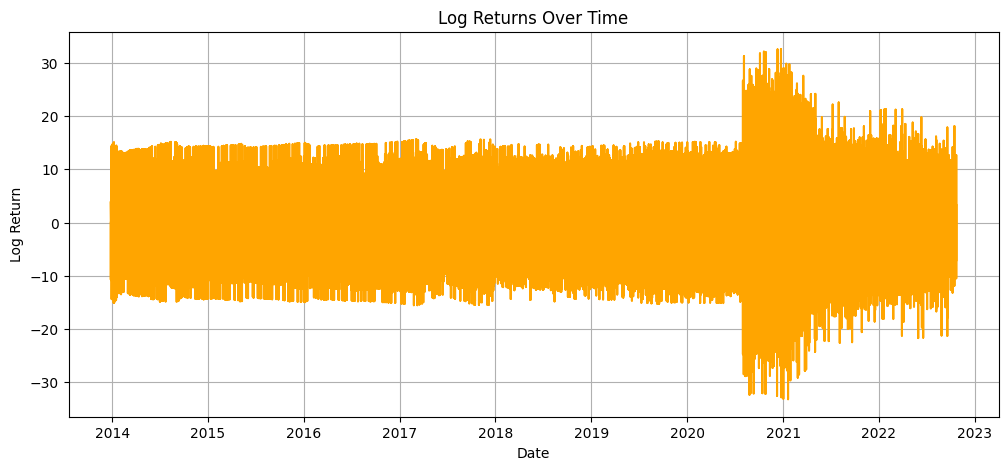

In [36]:
#Log returns trend
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['log_return'], color='orange')
plt.title("Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.savefig('../reports/figs/log_return_trend.png')

plt.show()


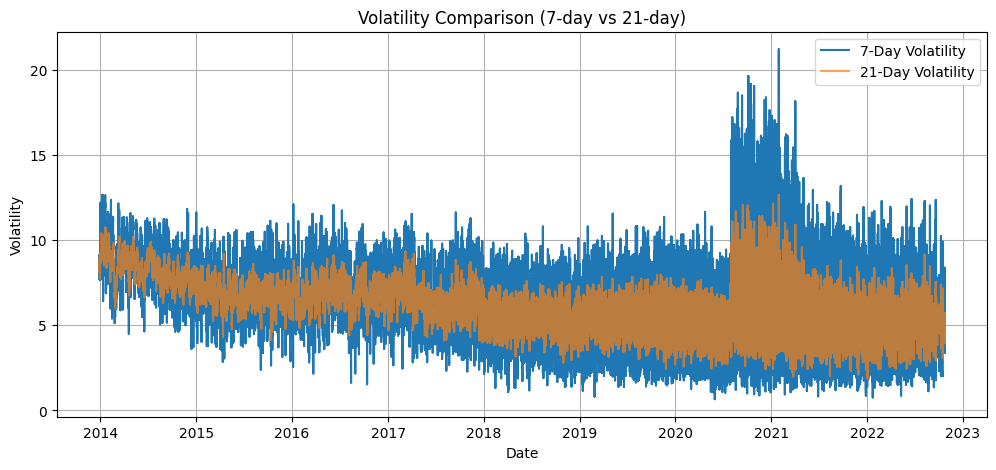

In [37]:
#Volatility (7-day) vs (21-day)
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['volatility_7d'], label='7-Day Volatility')
plt.plot(df['date'], df['volatility_21d'], label='21-Day Volatility', alpha=0.7)
plt.title("Volatility Comparison (7-day vs 21-day)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.savefig('../reports/figs/volatility_comparison.png')

plt.show()


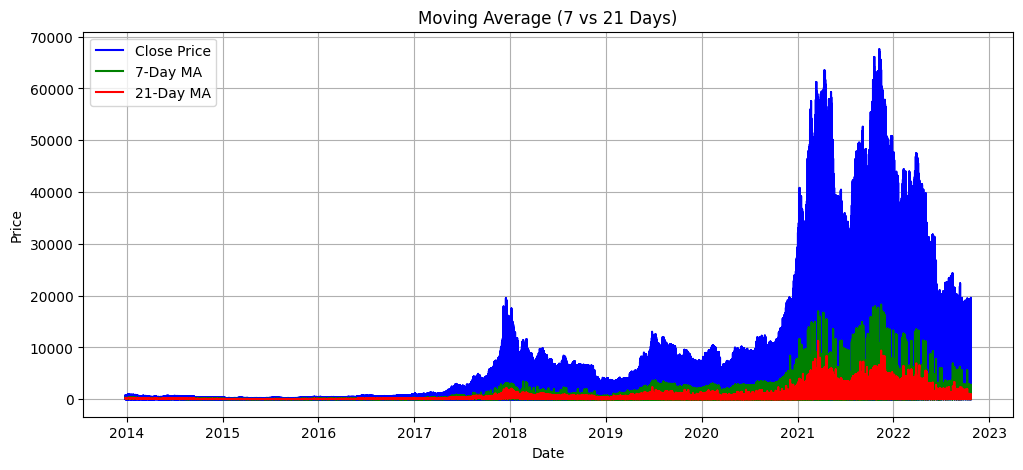

In [40]:
# Moving averages crossover
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['ma_7'], label='7-Day MA', color='green')
plt.plot(df['date'], df['ma_21'], label='21-Day MA', color='red')
plt.title("Moving Average (7 vs 21 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig('../reports/figs/Moving averages crossover.png')

plt.show()


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

num_df = df.select_dtypes(include=['number'])


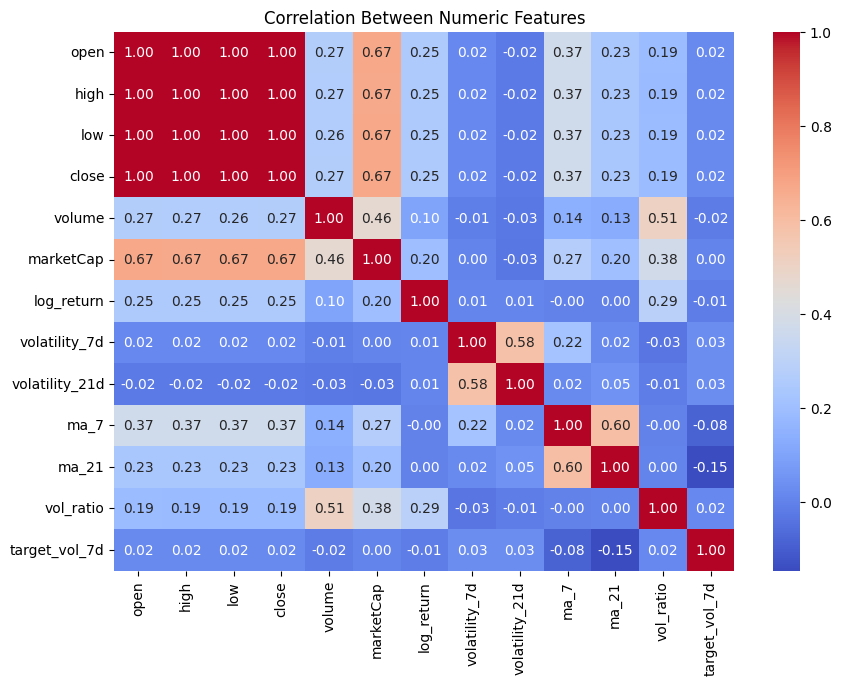

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.savefig('../reports/figs/Correlation Between Numeric Features.png')

plt.show()


In [ ]:
# Distribution of target variable

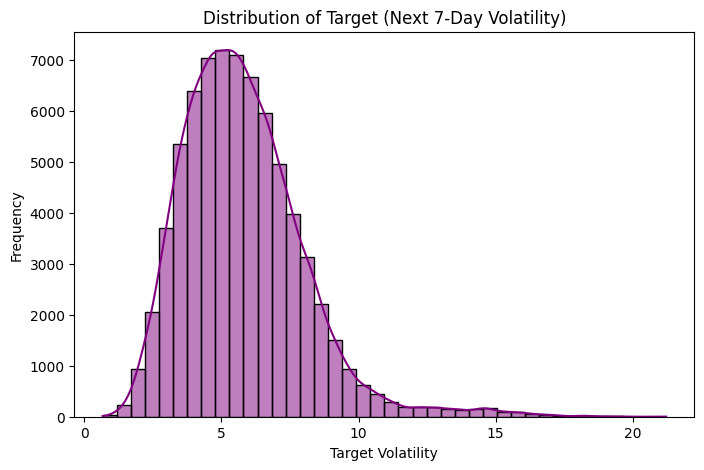

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['target_vol_7d'], bins=40, kde=True, color='purple')
plt.title("Distribution of Target (Next 7-Day Volatility)")
plt.xlabel("Target Volatility")
plt.ylabel("Frequency")
plt.savefig('../reports/figs/Distribution of Target (Next 7-Day Volatility.png')

plt.show()


In [17]:
# Relationship between variables


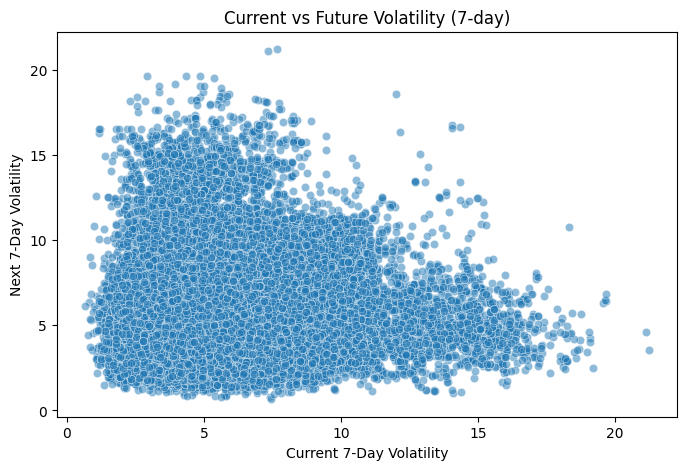

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='volatility_7d', y='target_vol_7d', data=df, alpha=0.5)
plt.title("Current vs Future Volatility (7-day)")
plt.xlabel("Current 7-Day Volatility")
plt.ylabel("Next 7-Day Volatility")
plt.savefig('../reports/figs/urrent vs Future Volatility (Next 7-Day Volatility.png')

plt.show()


In [19]:
# Volume activity vs returns

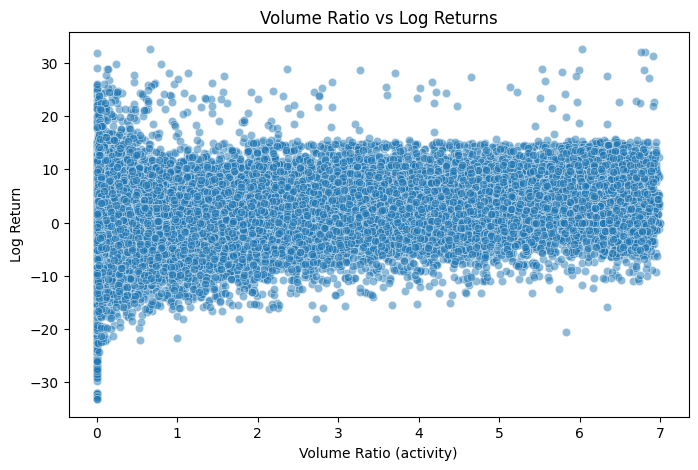

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='vol_ratio', y='log_return', data=df, alpha=0.5)
plt.title("Volume Ratio vs Log Returns")
plt.xlabel("Volume Ratio (activity)")
plt.ylabel("Log Return")
plt.savefig('../reports/figs/Volume Ratio vs Log Returns.png')

plt.show()


In [24]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [25]:
num_df = df.select_dtypes(include=['number'])


In [26]:
corr_target = num_df.corr()['target_vol_7d'].sort_values(ascending=False)
corr_target


target_vol_7d     1.000000
volatility_21d    0.032240
volatility_7d     0.029187
close             0.023201
low               0.022813
open              0.022793
high              0.022791
vol_ratio         0.016021
marketCap         0.003653
log_return       -0.014495
volume           -0.017704
ma_7             -0.082941
ma_21            -0.145506
Name: target_vol_7d, dtype: float64

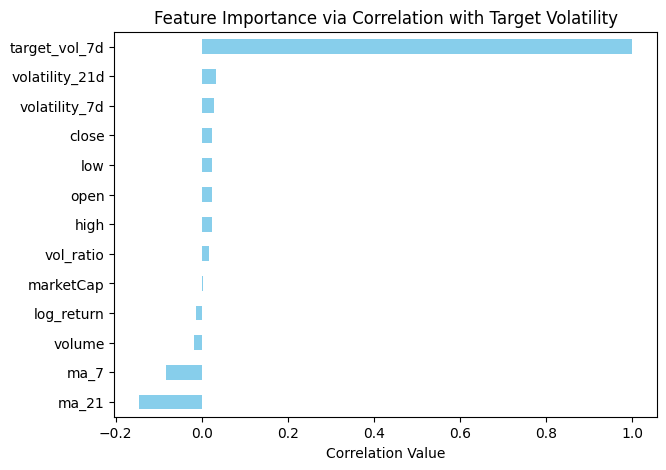

In [33]:
plt.figure(figsize=(7,5))
corr_target.dropna().sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance via Correlation with Target Volatility")
plt.xlabel("Correlation Value")
plt.savefig('../reports/figs/volatility_trend.png')

plt.show()


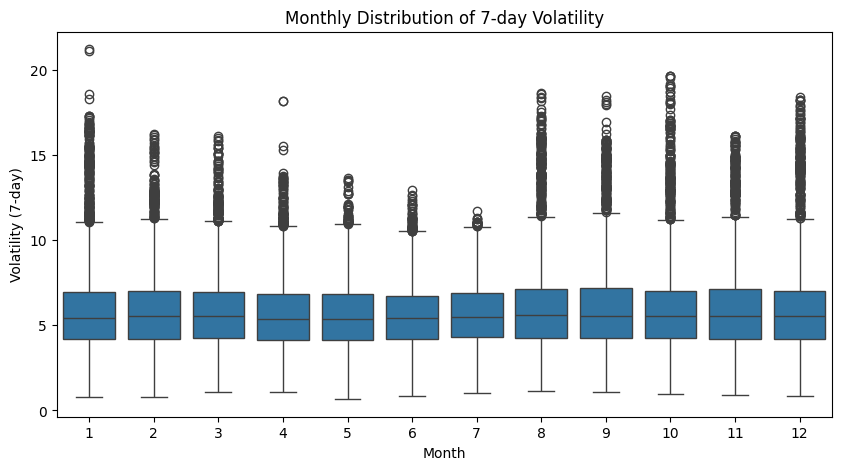

In [34]:
df['month'] = df['date'].dt.month
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='volatility_7d', data=df)
plt.title("Monthly Distribution of 7-day Volatility")
plt.xlabel("Month")
plt.ylabel("Volatility (7-day)")
plt.savefig('../reports/figs/volatility_trend.png')
plt.show()


<Figure size 640x480 with 0 Axes>